In [1]:
map_size = 4000
sqrt_n_grids = 10
epsilon = 1
point = (2000,2000)

import src.graph_generator as gg
import numpy as np
a = gg.GeoIGraphGenerator(map_size=map_size, sqrt_n_grids=sqrt_n_grids)
a.make_graph()
a.make_wig()
a.make_sd()
a.save()

## Compare utility by the experiment

### WIG
- a complete graph weighted by the Euclidean distance

### MAP
- a synthetic map
    - 4000 * 4000 side length (can be changed)
    - 10 * 10 grids (can be changed)
    - epsilon = 1
    
### Mechanisms
- S-LM
- S-PIM
- ELM

### Experiments
- perturbation of one location (2000,2000) (not trajectry)
- iterate this perturbation

In [2]:
import matplotlib.pyplot as plt
def show_utility(mec, n_iter=10000):
    mec.load_from_jbl(f"mapsize{map_size}_n_grids{sqrt_n_grids ** 2}")
    mec.build_distribution(epsilon)
    samples = np.zeros((n_iter,2))
    errors = np.zeros((n_iter,1))
    
    for i in range(n_iter):
        samples[i,:] = mec.perturb(point)
        errors[i,:] = np.linalg.norm(point - samples[i,:])
        
    print("ERROR:", np.average(errors))
    
    #plt.scatter(samples[:,0], samples[:,1])
    
    plt.hist2d(samples[:,0], samples[:,1], bins=100)
    plt.xlim(1995,2005)
    plt.ylim(1995,2005)

scaled-laplace-mechanism
ERROR: 2.336515264552096


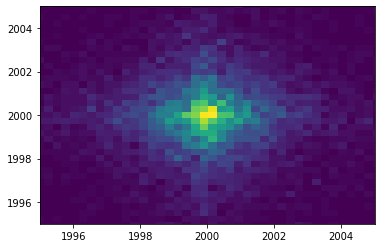

In [3]:
import src.scaled_laplace_mechanism as SLM
slm = SLM.ScaledLaplaceMechanism()
show_utility(slm)

scaled-planar-isotropic-mechanism
ERROR: 3.0162900781135913


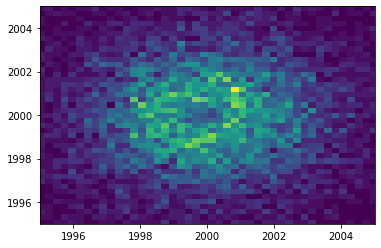

In [4]:
import src.scaled_planar_isotropic_mechanism as SPIM
spim = SPIM.ScaledPlanarIsotropicMechanism()
show_utility(spim)

exponential-like-mechanism
ERROR: 0.0


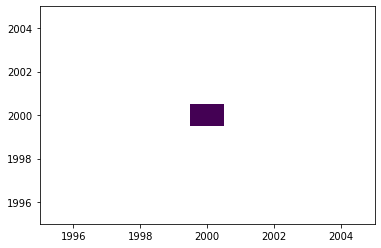

In [5]:
import src.exponential_like_mechanism as ELM
elm = ELM.ExponentialLikeMechanism()
show_utility(elm)

sensitivity hull


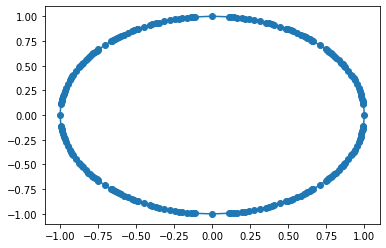

In [6]:
print("sensitivity hull")
plt.plot(spim.vertices[:,0], spim.vertices[:,1], marker="o")